# Közlekedési hálózatok vizsgálata

In [1]:
from scipy.io import mmread
import konect2networkx as k2n
import networkx as nx
import matplotlib.pyplot as plt
import pprint

Közlekedési hálózatok gráfjait fogom vizsgálni feszítőfák segítségével. Generálok n darab feszítőfát és azon belül megnézem, hogy a különöző élek milyen valószínűséggel fordulnak elő a feszítőfákban. Ez által kaphatunk egy képet arról, hogy az adott hálózatban melyek a legnagyobb jelentőséggel bíró élek, azaz kapcsolatok.

## Gráf beolvasása fájlból

In [2]:
## import network
# param: internal name of the network (konect graph) or name of the file w extension (.mtx format only)
def network_graph(network):
    ext = network[len(network) - 4:]

    if (ext == ".mtx"):
        try:
          a = mmread(network)
          G = nx.Graph(a)
        except:
          print("Nincs ilyen .mtx fájl a mappában")
    else:
        try:
          G = k2n.get(network, download = True, logging = False)
        except:
          print("Nem létezik ilyen nevű konect gráf")
    
    return G

Jelenleg kétféle fájlformátumot fogad el a metódus: *.mtx* kiterjesztést vagy kiterjesztés nélküli konect gráfot. A konect gráfokat valójában csak egy string határozza meg, amit a *konect2networkx* függvénykönyvtár értelmez.<br>A visszatérési érték egy gráf lesz.

A függvény megvizsgálja a kiterjesztést, majd *mtx* fájl esetében megpróbálja beolvasni a fájlt abból a mappából, amiben a notebook is található. Ha nem találja, figyelmeztet a hibára. Ha kiterjesztés nélküli stringet adunk meg a paraméterben, konect gráfként értelmezi. Ha nem találja az adott nevű gráfot, hibát dob.

> TODO : más formátumokat is elfogadni (pl csv)

## 1. Uniform véletlen feszítőfák (UST) generálása

Egy gráfnak több feszítőfája is lehet. Egy véletlenszerűen kiválasztott feszítőfát nevezünk UST-nek.

In [24]:
# param: the graph, number of generated ust graphs(int)
def ust_matrix(G, n):
  orig_edges = list(G.edges())

  # initalizing 2d matrix 
  res = [[0 for i in range(0, G.number_of_edges())] for j in range(n + 1)]
    
  # copying the edge list into the first row of the matrix
  for i in range(G.number_of_edges()):
      res[0][i] = orig_edges[i]

  for i in range(1, n):
      # generating n number of ust graphs
      tree = nx.random_spanning_tree(G, None)
      tree_edges = list(tree.edges())
      for j in range(G.number_of_edges()):
          # checking if an edge is in the ust or not
          found = 0
          k = 0
          while k in range(0, tree.number_of_edges())  and  found == 0:
            if orig_edges[j] == tree_edges[k]:
                res[i][j] = 1
                found = 1
            k += 1

  return res

Paraméterben a gráfot kell megadni (amit a *network_graph()* metódus ad vissza) és egy számot, amennyi feszítőfát generálni akarunk.<br>A függvény egy 2D-s tömbbel, azaz egy mátrixszal tér vissza. Ennek a tömbnek az első sorában az eredeti gráf élei találhatóak, pontpárok segítségével megadva. Ezt értelmezzük egy táblázat fejléceként. A 2D-s tömb további sorai az egyes legenerált UST-ket jellemzi. A sorokban 0 vagy 1 található, aszerint, hogy a feszítőfába belekerült-e az az él, amit az adott oszlop fejléce leír.

#### Példa egy konect gráffal

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Eredeti gráf:


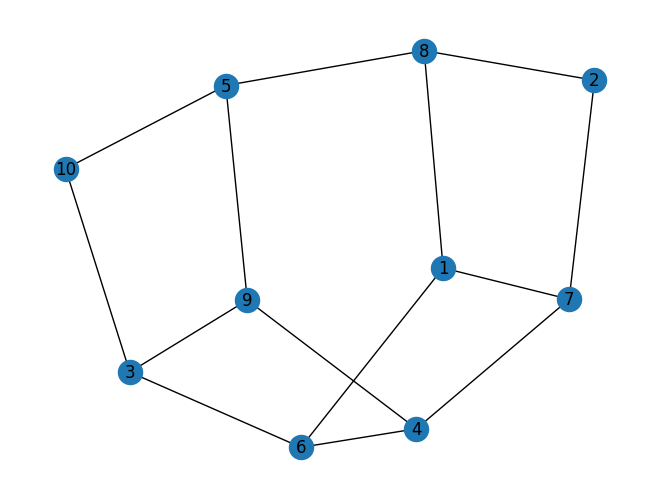

In [25]:
G = network_graph('brunson_southern-women')
res = ust_matrix(G, 6)

print("\n")
for row in res:
  print(row)

# drawing original konect graph
G2 = nx.Graph()
G2.add_edges_from(res[0])
print("\nEredeti gráf:")
nx.draw(G2, with_labels=True)

Példa gráf bemutatása. Az eredeti gráfról láthatunk képet. Ennek a gráfnak 10 pontja és 14 éle van, így több kör is található benne. 6 darab uniform véletlen feszítőfát generáltunk, ami megjelenik a 2D-s tömbben.

> TODO : print kiszervezése metódusba

> TODO : szebb print format

#### Példa egy mtx-ből beolvasott gráffal



[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 20), (0, 30), (0, 40), (0, 50), (0, 60), (0, 70), (0, 80), (0, 90), (0, 100), (1, 11), (2, 22), (3, 33), (4, 44), (5, 55), (6, 66), (7, 77), (8, 88), (9, 99), (10, 11), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (11, 19), (11, 21), (11, 31), (11, 41), (11, 51), (11, 61), (11, 71), (11, 81), (11, 91), (11, 100), (12, 22), (13, 33), (14, 44), (15, 55), (16, 66), (17, 77), (18, 88), (19, 99), (20, 22), (21, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 32), (22, 42), (22, 52), (22, 62), (22, 72), (22, 82), (22, 92), (22, 100), (23, 33), (24, 44), (25, 55), (26, 66), (27, 77), (28, 88), (29, 99), (30, 33), (31, 33), (32, 33), (33, 34), (33, 35), (33, 36), (33, 37), (33, 38), (33, 39), (33, 43), (33, 53), (33, 63), (33, 73), (33, 83), (33, 93), (33, 100), (34, 44), (35, 55), (36, 66), (37, 77), (38, 88), (39, 99), (40, 44), (41, 44), (42, 44), 

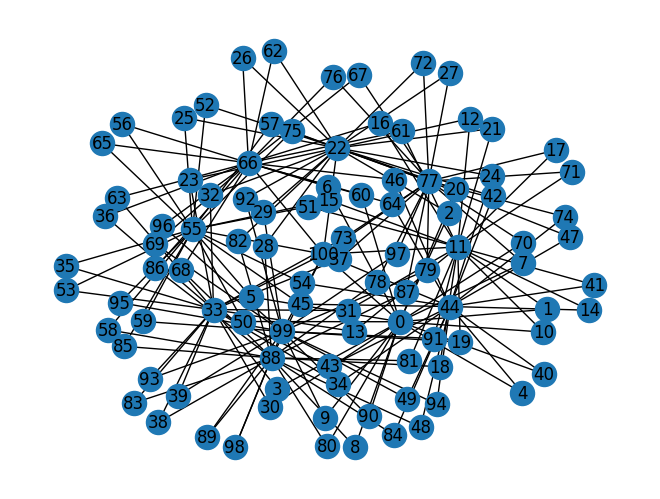

In [30]:
G = network_graph('GD06_theory.mtx')
res = ust_matrix(G, 6)

print("\n")
for row in res:
  print(row)

# plotting a graph with .mtx extension
G2 = nx.Graph()
G2.add_edges_from(res[0])
print("\nEredeti gráf:")
nx.draw(G2, with_labels=True)

Példa egy nagyobb gráfot használva. Ennek a gráfnak 101 pontja és  190 éle van. Most is 6 darab UST-t generáltunk.

## UST gráfok alapján normalizálás

In [26]:
# param: a matrix returned by the ust_matrix() func
def ust_normalized(res):

  number_of_edges = len(res[0])
  number_of_ust = len(res)
  normal_res = [[0 for i in range(number_of_edges)] for j in range(2)]

  # copy edgelist of the original graph
  normal_res[0] = res[0]

  for i in range(1, number_of_ust):
    for j in range(number_of_edges):
      normal_res[1][j] += res[i][j]
   
  # normalization
  for j in range(number_of_edges):
    normal_res[1][j] = round(normal_res[1][j]/(number_of_ust-1), 3)

  return normal_res

Paraméterben a *ust_matrix()* függvény által visszaadott 2D-s tömböt kell megadni.<br>A visszatérési érték szintén egy 2D-s tömb lesz, viszont most csak két sora van. Az első ugyanaz a fejléc sor, ami az eredeti gráf éleit tartalmazza, míg a második sor az előző mátrix 0-kat és 1-eseket tartalmazó sorai normalizálva. Most az egyes értékek 0 és 1 közötti float érték. Ha 1 az érték, akkor benne volt az él minden generált véletlen feszítőfában.

## Normalizált értékek megjelenítése grafikusan

In [13]:
## drawing weighted graph
# param: a matrix returned by the konect_ust_normalized() func
def draw_normalized(normal_res):
  G = nx.Graph()

  for j in range(len(normal_res[0])):
    G.add_edge(normal_res[0][j][0], normal_res[0][j][1], weight=normal_res[1][j] )

  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.5 and d["weight"] > 0.1]
  enone = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.1]

  pos = nx.spring_layout(G)

  # nodes
  nx.draw_networkx_nodes(G, pos)

  # edges
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed")
  nx.draw_networkx_edges(G, pos, edgelist=enone, width=3, alpha=0.5, edge_color="c", style="dotted")

  # node labels
  nx.draw_networkx_labels(G, pos, font_size=11)

  # edge weight labels
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

  ax = plt.gca()
  ax.margins(0.08)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

Paraméterben a normalizált értékeket tartalmazó tömböt kell megadni.<br>Nincs visszatérési érték, a metódus grafikusan megjeleníti a normalizált feszítőfát.

Az eredménygráfban minden él szerepel, ami az eredeti gráfban is szerepelt, viszont a formázása változik a következő módon:
* Ha az él legalább 50% eséllyel fordult elő, akkor vastag fekete vonallal jelenik meg.
* Ha kevesebb, mint 50% viszont több, mint 10% esélye van, akkor lila szaggatott vonallal jelenik meg.
* Egyébként meg világoskék pontozott vonal köti össze a pontokat.

Az egyes élekre a normalizált értékük is rá van írva.

#### Példa egy normalizált konect gráffal

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[0.347, 0.183, 0.22, 0.703, 0.337, 0.337, 0.243, 0.663, 0.55, 0.63, 0.19, 0.43, 0.72, 0.563]


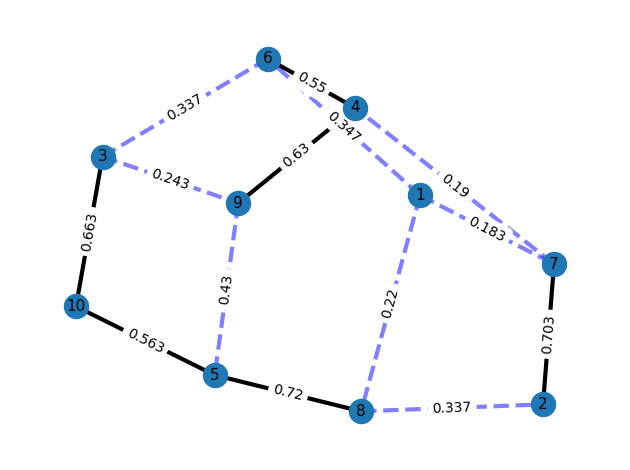

In [29]:
G = network_graph('brunson_southern-women')
res = ust_matrix(G, 300)
normal_res = ust_normalized(res)

print("\n")
for row in normal_res:
  print(row)

draw_normalized(normal_res)

Az előbb is használt konect gráfot vettük példának, de most 300 UST-t generáltunk, hogy pontosabb normalizált értékeket kapjunk.<br>A példán látszik, hogy melyik élek bírnak a legnagyobb jelentőséggel.

> NOTE : a szebb printet itt is lehetne alkalmazni

#### Példa egy normalizált, mtx-ből beolvasott gráffal



[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 20), (0, 30), (0, 40), (0, 50), (0, 60), (0, 70), (0, 80), (0, 90), (0, 100), (1, 11), (2, 22), (3, 33), (4, 44), (5, 55), (6, 66), (7, 77), (8, 88), (9, 99), (10, 11), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (11, 17), (11, 18), (11, 19), (11, 21), (11, 31), (11, 41), (11, 51), (11, 61), (11, 71), (11, 81), (11, 91), (11, 100), (12, 22), (13, 33), (14, 44), (15, 55), (16, 66), (17, 77), (18, 88), (19, 99), (20, 22), (21, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 32), (22, 42), (22, 52), (22, 62), (22, 72), (22, 82), (22, 92), (22, 100), (23, 33), (24, 44), (25, 55), (26, 66), (27, 77), (28, 88), (29, 99), (30, 33), (31, 33), (32, 33), (33, 34), (33, 35), (33, 36), (33, 37), (33, 38), (33, 39), (33, 43), (33, 53), (33, 63), (33, 73), (33, 83), (33, 93), (33, 100), (34, 44), (35, 55), (36, 66), (37, 77), (38, 88), (39, 99), (40, 44), (41, 44), (42, 44), 

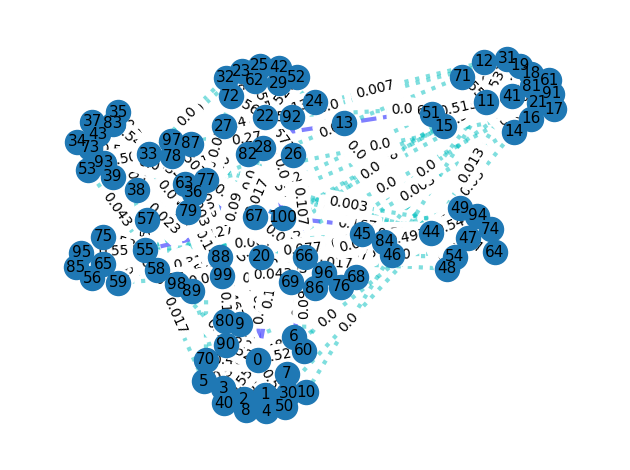

In [31]:
G = network_graph('GD06_theory.mtx')
res = ust_matrix(G, 300)
normal_res = ust_normalized(res)

print("\n")
for row in normal_res:
  print(row)

draw_normalized(normal_res)

Ez esetben is 300 feszítőfát generáltunk, viszont előfordul olyan él, ami 0 eséllyel fordul elő az UST-kben.

> TODO : nagyobb gráfokhoz szebb megjelenítést kitalálni

## 2. Betweenness centrality használata

Központisági mérőszám. A gráfban meghatározzuk a legrövidebb utakat minden csomópontpár között. Egy pont BC értéke ezeken az utakon alapul aszerint, hogy hány ilyen legrövidebb út tartalmazza. Értéke 0 és 1 között lehet, ahol 1 a maximum érték.

In [5]:
G = network_graph('brunson_southern-women')

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


Beolvastam a kisebbik gráfot, amit már használtam korábban is.

In [11]:
res = nx.betweenness_centrality(G)
res_e = nx.edge_betweenness_centrality(G)

print('#--- nx.betweenness_centrality ---#\n')
pprint.pprint(res)
print('\n#--- nx.betweenness_centrality ---#\n')
pprint.pprint(res_e)

#--- nx.betweenness_centrality ---#

{1: 0.1412037037037037,
 2: 0.03472222222222222,
 3: 0.12268518518518516,
 4: 0.15046296296296294,
 5: 0.18981481481481483,
 6: 0.15046296296296294,
 7: 0.12268518518518516,
 8: 0.18981481481481483,
 9: 0.1412037037037037,
 10: 0.034722222222222224}

#--- nx.betweenness_centrality ---#

{(1, 6): 0.16296296296296298,
 (1, 7): 0.11111111111111112,
 (1, 8): 0.15185185185185185,
 (2, 7): 0.12037037037037036,
 (2, 8): 0.13518518518518519,
 (3, 6): 0.1648148148148148,
 (3, 9): 0.11111111111111112,
 (3, 10): 0.12037037037037036,
 (4, 6): 0.11296296296296296,
 (4, 7): 0.1648148148148148,
 (4, 9): 0.16296296296296298,
 (5, 8): 0.21666666666666665,
 (5, 9): 0.15185185185185185,
 (5, 10): 0.1351851851851852}


Beszélhetünk betweenness centrality-ről vagy edge betwenness centrality-ről. Az első a pontok központiságát írja le, míg a második az egyes éleket karakterizálja.<br>Mivel az UST gráfokkal az éleket vizsgáltam, így most az edge betwenness centrality értékkel fogok mélyebben foglalkozni a továbbiakban.

> TODO : hasonlóan megrajzolni a gráfok éleit, mint a draw_normalized() metódusomban az ust-ket